# Feature extraction code of Task 2

In [191]:
import numpy as np
import pandas as pd

def normalize(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler();
    
    norm_df=pd.DataFrame(scaler.fit_transform(df[['ch1','ch2']]))
    norm_df.columns=['ch1','ch2']
    norm_df['time']=df['timestamp_ms']
    return norm_df

def mean_sq(arr):
    ms=0
    for i in arr:
        ms+=(i**2)
    return ms/len(arr)

def extract(df,window_size=100,step_size=10):
    new_df=pd.DataFrame({
    'time':[],
    'rms_ch1':[],
    'rms_ch2':[],
    'mav_ch1':[],
    'mav_ch2':[],
    'mse_ch1':[],
    'mse_ch2':[],
    })

    n=len(df)
    for i in range(0,n-window_size+1,step_size):
        ch1=df['ch1'][i:i+window_size] # to access only 100 elements of ch1 at a time
        ch2=df['ch2'][i:i+window_size]
        
        row={
        'mse_ch1':[mean_sq(ch1)],
        'mse_ch2':[mean_sq(ch2)],
        'mav_ch1':[np.mean(ch1)],
        'mav_ch2':[np.mean(ch2)],
        'time':[np.mean(df['time'][i:i+window_size])]}
        
        row['rms_ch1']=np.sqrt(row['mse_ch1'])
        row['rms_ch2']=np.sqrt(row['mse_ch2'])
        
        new_df=pd.concat([new_df,pd.DataFrame(row)],ignore_index=True)
        
    return new_df

def get_feature(file_loc,suffix):
    df=pd.read_csv(file_loc)
    norm_df=normalize(df)
    new_df=extract(norm_df)
    new_df['label']=np.full(len(new_df),df['label'][0])
    new_df.to_csv(f'features_{suffix}.csv',index=False)
    return new_df

# 1. Combine all Feature Files

In [192]:
files=['clenched_data.csv','fist_data.csv','four_data.csv','index_finger_data.csv','okay_data.csv','peace_data.csv','rest_data.csv','rock_data.csv','spread_data.csv','three_data.csv','thumb_data.csv','up_data.csv']

df=pd.DataFrame()
for f in files:
    df=pd.concat([df,get_feature(f'Dataset/{f}',f[0:f.rindex('_')])],ignore_index=True)
df

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,label
0,495.0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717,clenched
1,595.0,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657,clenched
2,695.0,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045,clenched
3,795.0,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679,clenched
4,895.0,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830,clenched
...,...,...,...,...,...,...,...,...
7087,59095.0,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516,up
7088,59195.0,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219,up
7089,59295.0,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501,up
7090,59395.0,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703,up


#  2. Encode the Labels

- Use LabelEncoder from sklearn.preprocessing to convert gesture names into numeric labels (0–11)

In [193]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,time,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2,label
0,495.0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717,0
1,595.0,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657,0
2,695.0,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045,0
3,795.0,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679,0
4,895.0,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830,0
...,...,...,...,...,...,...,...,...
7087,59095.0,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516,11
7088,59195.0,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219,11
7089,59295.0,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501,11
7090,59395.0,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703,11


- Print a dictionary mapping of label numbers to gesture names.


In [194]:
enc.classes_ # converted to numeric label from 0 - 11

array(['clenched', 'fist', 'four', 'index_finger', 'okay', 'peace',
       'rest', 'rock', 'spread', 'three', 'thumb', 'up'], dtype=object)

In [195]:
# Method - 1
print(pd.concat([pd.DataFrame(enc.classes_),pd.DataFrame(df['label'].unique())],axis='columns'))

               0   0
0       clenched   0
1           fist   1
2           four   2
3   index_finger   3
4           okay   4
5          peace   5
6           rest   6
7           rock   7
8         spread   8
9          three   9
10         thumb  10
11            up  11


In [196]:
# Method - 2
label_to_gesture={i:label for i,label in enumerate(enc.classes_)}
print(label_to_gesture) 

{0: 'clenched', 1: 'fist', 2: 'four', 3: 'index_finger', 4: 'okay', 5: 'peace', 6: 'rest', 7: 'rock', 8: 'spread', 9: 'three', 10: 'thumb', 11: 'up'}


# 3. Split the Dataset

In [197]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['time','label'])
x

,rms_ch1,rms_ch2,mav_ch1,mav_ch2,mse_ch1,mse_ch2
0,0.609791,0.590523,0.529388,0.516122,0.371845,0.348717
1,0.605118,0.576764,0.535306,0.505102,0.366168,0.332657
2,0.581611,0.584846,0.509592,0.510816,0.338272,0.342045
3,0.572619,0.592181,0.494898,0.519592,0.327893,0.350679
4,0.566079,0.597353,0.485510,0.522245,0.320446,0.356830
...,...,...,...,...,...,...
7087,0.558088,0.583538,0.475102,0.496735,0.311462,0.340516
7088,0.544779,0.585849,0.463673,0.505102,0.296785,0.343219
7089,0.539702,0.598749,0.455102,0.518367,0.291279,0.358501
7090,0.540605,0.602248,0.452245,0.520612,0.292253,0.362703


In [198]:
y=df['label']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [199]:
y_test.unique()

array([ 7,  3,  1,  4,  8, 10,  5, 11,  0,  2,  9,  6])

In [200]:
# x_train , y_train

# 4. Train a Logistic Regression Model

In [201]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(x_train,y_train)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

# 5. Evaluate the Model


In [202]:
y_pred=model.predict(x_test)
len(pd.Series(y_pred).unique())
# OR
# import numpy as np
# np.unique(y_pred)
# as unique() is used for series or array

10

In [203]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.00      0.00      0.00       118
           2       0.09      0.29      0.13       118
           3       0.00      0.00      0.00       118
           4       0.00      0.00      0.00       118
           5       0.10      0.01      0.02       118
           6       0.00      0.00      0.00       119
           7       0.09      0.10      0.09       118
           8       0.12      0.39      0.18       119
           9       0.09      0.16      0.12       118
          10       0.12      0.25      0.16       118
          11       0.00      0.00      0.00       119

    accuracy                           0.10      1419
   macro avg       0.05      0.10      0.06      1419
weighted avg       0.05      0.10      0.06      1419



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  6. Visualize Results

In [204]:
cm=confusion_matrix(y_test, y_pred)

In [205]:
# Display as a DataFrame for readability
cm_df = pd.DataFrame(cm, index=[f"True {i}" for i in range(len(cm))],columns=[f"Pred {i}" for i in range(len(cm))])

print(cm_df)

         Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0        0       1      42       1       0       0       0       9   
True 1        0       0      37       0       0       2       0      12   
True 2        0       0      34       0       0       2       0       7   
True 3        1       2      16       0       0       2       0      15   
True 4        0       0      41       0       0       0       0      16   
True 5        0       1      38       0       0       1       0      21   
True 6        0       1      32       0       0       1       0       4   
True 7        0       2      29       0       0       0       0      12   
True 8        0       1      27       0       0       1       0      12   
True 9        0       1      26       0       0       0       0       8   
True 10       0       0      37       0       0       0       0       9   
True 11       0       0      37       0       0       1       0      14   

         Pred 8  Pred 9 

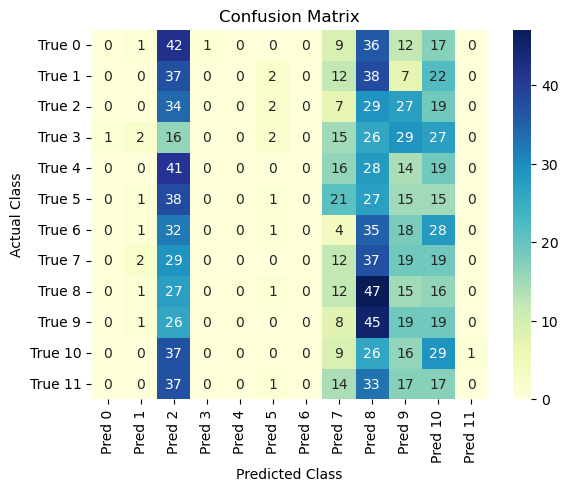

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()